---   
<img align="left" width="75" height="75" src="https://upload.wikimedia.org/wikipedia/en/c/c8/University_of_the_Punjab_logo.png"> 
 
<h1 align="center">Department of Data Science</h1>
<h1 align="center">Course: Deep Learning</h1> 
 
 
---
<h3><div align="right">Instructor: Dr. Muhammad Farooq</div></h3>  

#### <div style="text-align: right"> Student: Kiran Khursheed  </div>
#### <div style="text-align: right"> Roll no: MSDSF21M504 </div>
## <div style="text-align: center"> Assignment 2 </div>

##### Loading important libraries

In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from form import *

get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['figure.figsize'] = (5.0, 4.0) # setting the default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

get_ipython().run_line_magic('load_ext', 'autoreload')
get_ipython().run_line_magic('autoreload', '2')

np.random.seed(1)


##### Dataset; same as that of assignment 1

In [2]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_dataset()

##### Displaying an image from the dataset, changing indexes 

y = 0. It's a nostop picture.


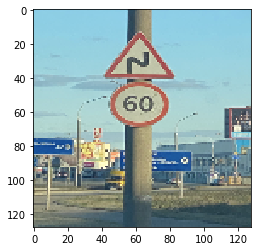

In [3]:
index = 18
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0, index]) + ". It's a " + classes[train_y[0, index]] + " picture.")

##### Exploring dataset

In [4]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 32
Number of testing examples: 13
Each image is of size: (128, 128, 3)
train_x_orig shape: (32, 128, 128, 3)
train_y shape: (1, 32)
test_x_orig shape: (13, 128, 128, 3)
test_y shape: (1, 13)


##### Convertion to vector

In [5]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten / 255.
test_x = test_x_flatten / 255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))
# Here 128 X 128 X 3 is 49152.


train_x's shape: (49152, 32)
test_x's shape: (49152, 13)


### 2-layer neural network

In [6]:
### CONSTANTS DEFINING THE MODEL ####

n_x = 49152     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)


In [7]:
# GRADED FUNCTION: for two_layer_model

def two_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    
     # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1". Output: "A1, cache1, A2, cache2".
        
        
        A1, cache1 = linear_activation_forward(X, W1, b1, 'relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, 'sigmoid')
        
        
        # Compute cost
        cost = compute_cost(A2, Y)
        
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, 'sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, 'relu')
        
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        
        parameters = update_parameters(parameters, grads, learning_rate)
        

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters



Cost after iteration 0: 0.693324486703538
Cost after iteration 100: 0.36165247449549215
Cost after iteration 200: 0.08314734122653379
Cost after iteration 300: 0.021210627457893233
Cost after iteration 400: 0.011397317032161645
Cost after iteration 500: 0.007459649613069199
Cost after iteration 600: 0.005422851641837452
Cost after iteration 700: 0.004204661751427301
Cost after iteration 800: 0.0034034431095842995
Cost after iteration 900: 0.002841249152447459
Cost after iteration 1000: 0.0024275545483550317
Cost after iteration 1100: 0.002111761394120419
Cost after iteration 1200: 0.0018636160817595174
Cost after iteration 1300: 0.001664075533587541
Cost after iteration 1400: 0.0015004971483431086
Cost after iteration 1500: 0.001364294924602121
Cost after iteration 1600: 0.0012492424170359945
Cost after iteration 1700: 0.00115089466340948
Cost after iteration 1800: 0.001065900103871664
Cost after iteration 1900: 0.0009917775192771257
Cost after iteration 2000: 0.0009266632201790637
Cos

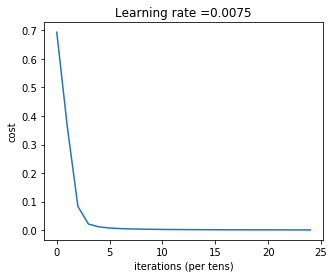

In [8]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

In [9]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 1.0


In [10]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.6923076923076923


###  L-layer Neural Network

In [11]:
### CONSTANTS defining the MODEL ###
layers_dims = [49152, 20, 7, 5, 1] #  5-layer model

In [12]:
# GRADED FUNCTION: n_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False): #lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    
    parameters = initialize_parameters_deep(layers_dims)
   
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        
        # Compute cost.
        cost = compute_cost(AL, Y)
        
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
        
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters


Cost after iteration 0: 0.703038
Cost after iteration 100: 0.468340
Cost after iteration 200: 0.321877
Cost after iteration 300: 0.270048
Cost after iteration 400: 0.238085
Cost after iteration 500: 0.213183
Cost after iteration 600: 0.192585
Cost after iteration 700: 0.175589
Cost after iteration 800: 0.160496
Cost after iteration 900: 0.147569
Cost after iteration 1000: 0.136586
Cost after iteration 1100: 0.126604
Cost after iteration 1200: 0.119708
Cost after iteration 1300: 0.111106
Cost after iteration 1400: 0.103543
Cost after iteration 1500: 0.097422
Cost after iteration 1600: 0.091978
Cost after iteration 1700: 0.087014
Cost after iteration 1800: 0.082617
Cost after iteration 1900: 0.080804
Cost after iteration 2000: 0.074871
Cost after iteration 2100: 0.071425
Cost after iteration 2200: 0.068234
Cost after iteration 2300: 0.065378
Cost after iteration 2400: 0.062727


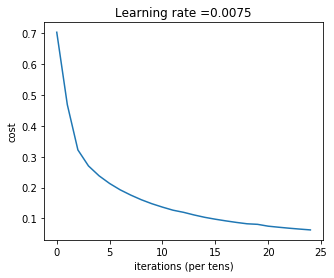

In [13]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations=2500, print_cost=True)

In [14]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 1.0


In [15]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.5384615384615384


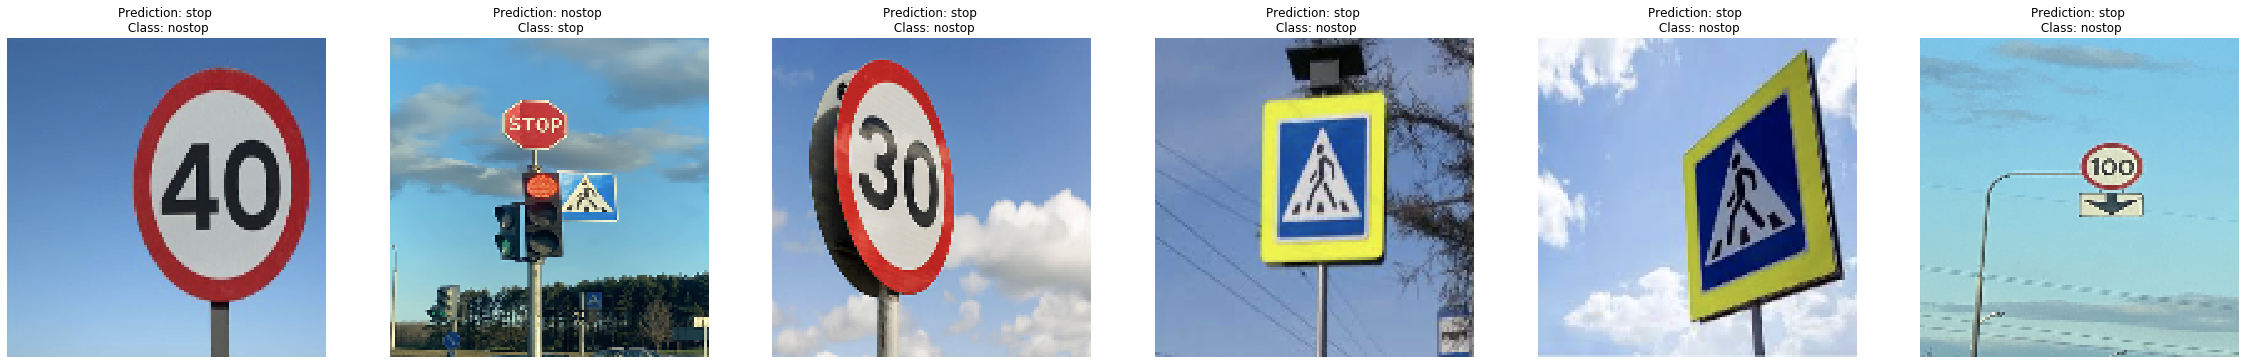

In [16]:
print_mislabeled_images(classes, test_x, test_y, pred_test)

## <div style="text-align: center"> End of Assignment 2 </div>